# Task-Prediction using Decision Tree Algorithm
# Iris dataset 

In [104]:
# Load Libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [103]:
#read file
ir= pd.read_csv('Iris.csv')
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
ir.shape

(150, 6)

In [8]:
ir.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
ir.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
ir.Species.replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),(0,1,2),inplace =True)

In [12]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [21]:
#import train-split function 
X=ir[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=ir['Species']

In [22]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [25]:
ir.iloc[0]

Id               1.0
SepalLengthCm    5.1
SepalWidthCm     3.5
PetalLengthCm    1.4
PetalWidthCm     0.2
Species          0.0
Name: 0, dtype: float64

In [26]:
 #split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=42)

In [27]:
classifier = RandomForestClassifier(n_estimators=3)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [29]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


# Identifying important features

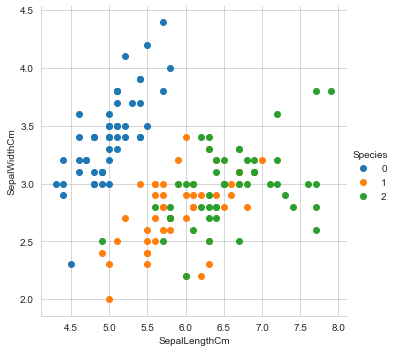

In [32]:
#to show different class of species
sns.set_style('whitegrid');
sns.FacetGrid(ir,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend();
plt.show();

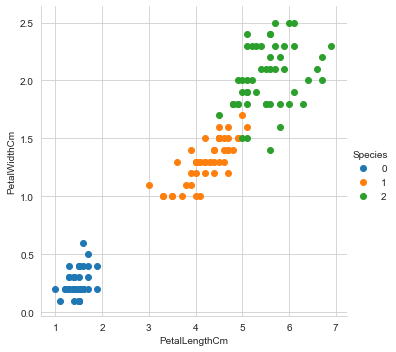

In [33]:
sns.set_style('whitegrid');
sns.FacetGrid(ir,hue='Species',size=5).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend();
plt.show();

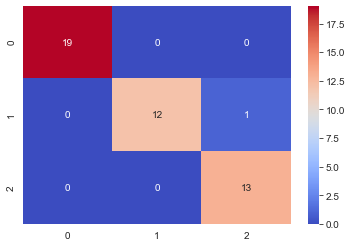

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),yticklabels=True,cmap='coolwarm',annot=True)

# Important details of model 

In [37]:
classifier.base_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
classifier.classes_

array([0, 1, 2], dtype=int64)

In [38]:
classifier.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1270390810, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1375829450, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

# Visualizing model using tree

In [47]:
import PIL
import pydotplus
from glob import glob
from IPython.display import display,Image
from sklearn.tree import export_graphviz

In [79]:
def save_image(clf,iteration,feature_name,target_name):
    file_name ='Iris' + str(iteration) +".png"
    dot_data=export_graphviz(
        clf, 
        out_file= None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph=pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print('Decision tree{} saved as png file'.format(iteration +1))  

In [85]:
col =ir.columns.tolist()
feature_name = col[1:5]
target_name=col[5]

In [86]:
feature_name

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [105]:
#tree for estimator 3
for i in range (len(classifier.estimators_)):
    save_image(classifier.estimators_[i], i,feature_names,target_name)

Decision tree1 saved as png file
Decision tree2 saved as png file
Decision tree3 saved as png file


In [106]:

target_names

'Species'

In [107]:
images =[PIL.Image.open(f) for f in glob('./*.png')]

In [108]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=799x895 at 0x20852082A08>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=835x1053 at 0x208528CF148>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=924x736 at 0x20852082AC8>]

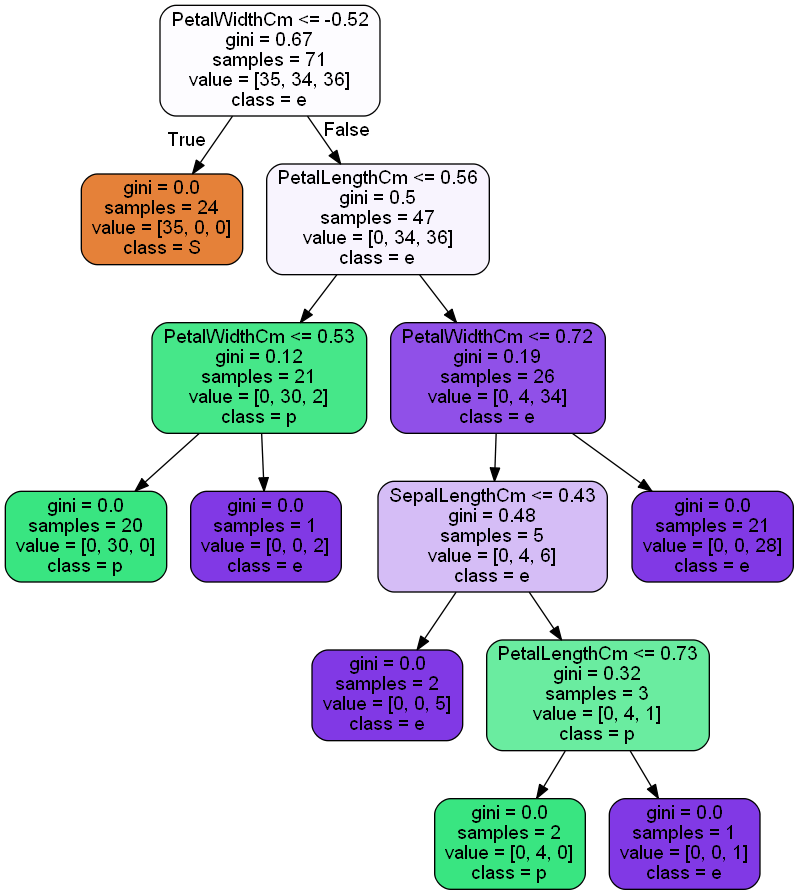

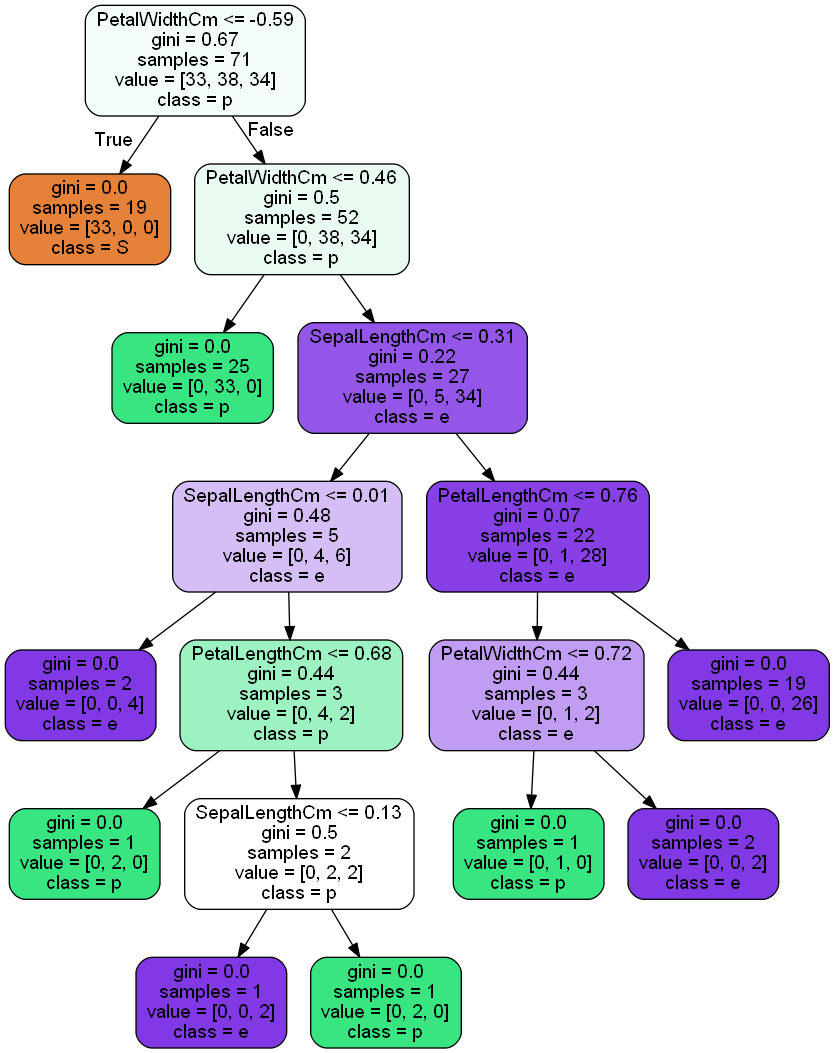

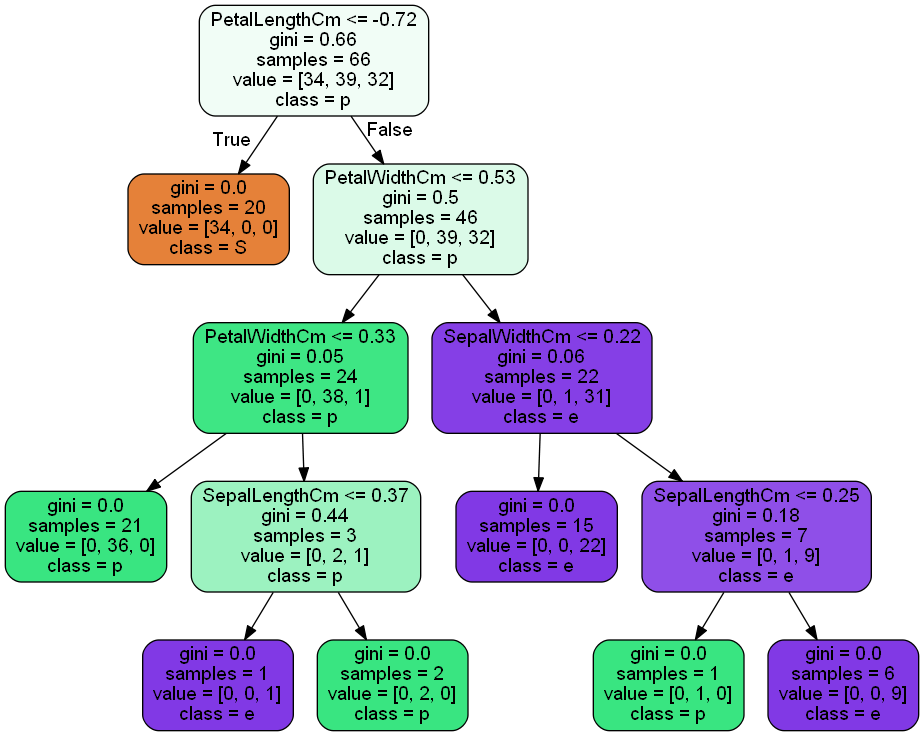

In [109]:
for im in images:
    display(Image(filename=im.filename,retina=True))